#### Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.metrics import roc_auc_score, log_loss, recall_score,accuracy_score,precision_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score,  KFold
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import xgboost
import time

import keras
import keras_metrics
from keras.models import Sequential
from keras.layers import Dense, Dropout


import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [2]:
def metrics(x,real, clf):
    print('roc_auc: ',roc_auc_score(real,clf.predict(x)))
    print('recall: ',recall_score(real,clf.predict(x)))
    print('accuracy: ',accuracy_score(real,clf.predict(x)))
    print('precision: ',precision_score(real,clf.predict(x)))
    return pd.DataFrame({'real':real,'predict':clf.predict(x),'proba1':clf.predict_proba(x)[:,1]})
def metrics2(real,x):
    print('roc_auc: ',roc_auc_score(real,x))
    print('recall: ',recall_score(real,x))
    print('precision: ',precision_score(real,x))
    return pd.DataFrame({'real':real,'predict':x,})

#### Считывание данных

In [3]:
data = pd.read_excel('ds1.xls')

In [4]:
data = data[:-1000]

#### Удаление пропусков

In [5]:
for i in data.columns:
    if data[i].isna().sum()!=0:
        data[i] = data[i].fillna(0)

#### Разделение на целевую переменную и предикторы

In [6]:
X = data.drop('class',axis=1)
y = data['class']

#### Масштабирование

In [7]:
XScale = pd.DataFrame(preprocessing.scale(X))
XScale.columns = X.columns
X=XScale

#### Распределение целевой переменной

In [8]:
y.value_counts()

1    3179
0    2220
Name: class, dtype: int64

#### Отбор важности признаков

In [9]:
forest = RandomForestClassifier(n_estimators=4500, max_depth = 20, n_jobs=-1,
                                      random_state=1234).fit(X, y)

In [10]:
forest_predictions = forest.predict(X)
features = pd.DataFrame(forest.feature_importances_, index=X.columns,
                        columns=['Importance']).sort_values(['Importance'], ascending=False)
features.head(15)

,Importance
"totalEn_15__(3000, 7000)",0.041591
"totalEn_7__(3000, 7000)",0.035264
"countEv_15__(3000, 7000)",0.030161
totalEn_15__,0.024522
"totalEn_15__(7000, 20000)",0.024082
totalEn_7__,0.022274
"totalEn_7__(500, 3000)",0.022220
countEv_15__,0.021956
"countEv_7__(3000, 7000)",0.021508
"MedianEn_15__(7000, 20000)",0.020785


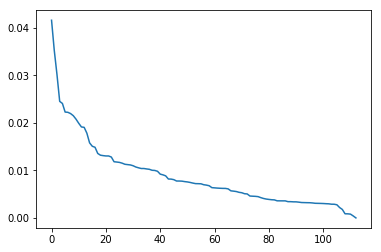

In [11]:
plt.plot(range(len(features.Importance.tolist())), 
         features.Importance.tolist())

In [12]:
col = features.index.tolist()
X1 = X[col]
X2 = X[col[:200]]
X3 = X[col[:120]]
X4 = X[col[:50]]
X5 = X[col[:20]]
X6 = X[col[:10]]

#### Разбиваем на тестовую и обучающую выборки

In [13]:
shuf = False

In [14]:
X_train1, X_test1, y_train, y_test = train_test_split(X1, y, test_size=0.25,random_state=12345, shuffle=shuf)
X_train2, X_test2, y_train, y_test = train_test_split(X2, y, test_size=0.25,random_state=12345, shuffle=shuf)
X_train3, X_test3, y_train, y_test = train_test_split(X3, y, test_size=0.25,random_state=12345, shuffle=shuf)
X_train4, X_test4, y_train, y_test = train_test_split(X4, y, test_size=0.25,random_state=12345, shuffle=shuf)
X_train5, X_test5, y_train, y_test = train_test_split(X5, y, test_size=0.25,random_state=12345, shuffle=shuf)
X_train6, X_test6, y_train, y_test = train_test_split(X6, y, test_size=0.25,random_state=12345, shuffle=shuf)

## Построение моделей

### Логистическая регрессия

In [71]:
lr = LogisticRegression(solver = 'liblinear')
kf = KFold(n_splits=5,shuffle=shuf,random_state = 1234)
print(cross_val_score(lr, X_train1, y_train, cv=kf, scoring='recall').mean()) 

0.6768317306137037


In [72]:
lr.fit(X_train1,y_train)
a=metrics(X_test1,y_test,lr)

roc_auc:  0.5746124031007751
recall:  0.6666666666666666
accuracy:  0.5493827160493827
precision:  0.42332613390928725


In [73]:
lr = LogisticRegression(solver = 'liblinear')
kf = KFold(n_splits=5,shuffle=shuf,random_state = 1234)
print(cross_val_score(lr, X_train2, y_train, cv=kf, scoring='recall').mean()) 

0.6768317306137037


In [74]:
lr.fit(X_train2,y_train)
a=metrics(X_test2,y_test,lr)

roc_auc:  0.5746124031007751
recall:  0.6666666666666666
accuracy:  0.5493827160493827
precision:  0.42332613390928725


In [75]:
lr = LogisticRegression(solver = 'liblinear')
kf = KFold(n_splits=5,shuffle=shuf,random_state = 1234)
print(cross_val_score(lr, X_train3, y_train, cv=kf, scoring='recall').mean()) 

0.6768317306137037


In [76]:
lr.fit(X_train3,y_train)
a=metrics(X_test3,y_test,lr)

roc_auc:  0.5746124031007751
recall:  0.6666666666666666
accuracy:  0.5493827160493827
precision:  0.42332613390928725


In [77]:
lr = LogisticRegression(solver = 'liblinear')
kf = KFold(n_splits=5,shuffle=shuf,random_state = 1234)
print(cross_val_score(lr, X_train4, y_train, cv=kf, scoring='recall').mean()) 

0.6754180347416427


In [78]:
lr.fit(X_train4,y_train)
a=metrics(X_test4,y_test,lr)

roc_auc:  0.5710132890365449
recall:  0.6904761904761905
accuracy:  0.5382716049382716
precision:  0.4176954732510288


In [79]:
lr = LogisticRegression(solver = 'liblinear')
kf = KFold(n_splits=5,shuffle=shuf,random_state = 1234)
print(cross_val_score(lr, X_train5, y_train, cv=kf, scoring='recall').mean()) 

0.6716212417465004


In [81]:
lr.fit(X_train5,y_train)
a=metrics(X_test5,y_test,lr)

roc_auc:  0.6045918367346939
recall:  0.7925170068027211
accuracy:  0.5530864197530864
precision:  0.4363295880149813


# Выбранная модель
### -----------------------------------------------------------------------

In [82]:
lr = LogisticRegression(solver = 'liblinear')
kf = KFold(n_splits=5,shuffle=shuf,random_state = 1234)
print(cross_val_score(lr, X_train6, y_train, cv=kf, scoring='recall').mean()) 

0.7377735085048842


In [83]:
lr.fit(X_train6,y_train)
a=metrics(X_test6,y_test,lr)

roc_auc:  0.6091203923429838
recall:  0.7414965986394558
accuracy:  0.5728395061728395
precision:  0.44672131147540983


### -----------------------------------------------------------------------

### Метод ближайших соседей

In [90]:
clf = KNeighborsClassifier()

In [91]:
search = GridSearchCV(clf, {'n_neighbors':[8,15,21],'weights':['uniform','distance']},
              n_jobs = -1,scoring= "recall",cv=kf).fit(X_train1, y_train)
[search.best_params_,search.best_score_]

[{'n_neighbors': 21, 'weights': 'distance'}, 0.7364081820149933]

In [92]:
search = GridSearchCV(clf, {'n_neighbors':[8,15,21],'weights':['uniform','distance']},
              n_jobs = -1,scoring= "recall",cv=kf).fit(X_train2, y_train)
[search.best_params_,search.best_score_]

[{'n_neighbors': 21, 'weights': 'distance'}, 0.7364081820149933]

In [93]:
search = GridSearchCV(clf, {'n_neighbors':[8,15,21],'weights':['uniform','distance']},
              n_jobs = -1,scoring= "recall",cv=kf).fit(X_train3, y_train)
[search.best_params_,search.best_score_]

[{'n_neighbors': 21, 'weights': 'distance'}, 0.7364081820149933]

In [94]:
search = GridSearchCV(clf, {'n_neighbors':[8,15,21],'weights':['uniform','distance']},
              n_jobs = -1,scoring= "recall",cv=kf).fit(X_train4, y_train)
[search.best_params_,search.best_score_]

[{'n_neighbors': 15, 'weights': 'uniform'}, 0.790371852843797]

In [95]:
search = GridSearchCV(clf, {'n_neighbors':[6,7,8,15,21],'weights':['uniform','distance']},
              n_jobs = -1,scoring= "recall",cv=kf).fit(X_train5, y_train)
[search.best_params_,search.best_score_]

[{'n_neighbors': 21, 'weights': 'uniform'}, 0.6957403371431271]

In [96]:
search = GridSearchCV(clf, {'n_neighbors':[6,7,8,9],'weights':['uniform','distance']},
              n_jobs = -1,scoring= "recall",cv=kf).fit(X_train6, y_train)
[search.best_params_,search.best_score_]

[{'n_neighbors': 9, 'weights': 'uniform'}, 0.7011346159837697]

## -------------------------------------------------------------------------------------------------------------------------------


In [104]:
clf  = KNeighborsClassifier(n_neighbors=21,weights = 'distance')
print(cross_val_score(clf, X_train1, y_train, cv=kf, scoring='recall').mean())

0.7364626752185918


In [105]:
a=metrics(X_test1,y_test,clf.fit(X_train1,y_train))

roc_auc:  0.5411129568106312
recall:  0.4523809523809524
accuracy:  0.5654320987654321
precision:  0.4104938271604938


### Градиентный бустинг

In [60]:
a = time.time()
xgb = xgboost.XGBClassifier()
gs = GridSearchCV(xgb, {'n_estimators':[25,50,100,200],
              'max_depth': [5,10,15]},
              n_jobs = -1,scoring= "recall",cv = kf).fit(X_train1, y_train)
print(time.time()-a)
[gs.best_params_,gs.best_score_]

204.2529788017273


[{'max_depth': 5, 'n_estimators': 100}, 0.8346060214151364]

In [61]:
a = time.time()
xgb = xgboost.XGBClassifier()
gs = GridSearchCV(xgb, {'n_estimators':[30,50,70],
              'max_depth': [5]},
              n_jobs = -1,scoring= "recall",cv = kf).fit(X_train2, y_train)
print(time.time()-a)
[gs.best_params_,gs.best_score_]

27.21227526664734


[{'max_depth': 5, 'n_estimators': 50}, 0.8302515243407805]

In [62]:
a = time.time()
xgb = xgboost.XGBClassifier()
gs = GridSearchCV(xgb, {'n_estimators':[30,50,70],
              'max_depth': [5]},
              n_jobs = -1,scoring= "recall",cv = kf).fit(X_train3, y_train)
print(time.time()-a)
[gs.best_params_,gs.best_score_]

25.63415765762329


[{'max_depth': 5, 'n_estimators': 50}, 0.8302515243407805]

In [63]:
a = time.time()
xgb = xgboost.XGBClassifier()
gs = GridSearchCV(xgb, {'n_estimators':[26,27],
              'max_depth': [11,12]},
              n_jobs = -1,scoring= "recall",cv = kf).fit(X_train4, y_train)
print(time.time()-a)
[gs.best_params_,gs.best_score_]

13.88680100440979


[{'max_depth': 11, 'n_estimators': 27}, 0.8320657357989516]

In [64]:
a = time.time()
xgb = xgboost.XGBClassifier()
gs = GridSearchCV(xgb, {'n_estimators':[30,50,70],
              'max_depth': [5,8]},
              n_jobs = -1,scoring= "recall",cv = kf).fit(X_train5, y_train)
print(time.time()-a)
[gs.best_params_,gs.best_score_]

9.186903953552246


[{'max_depth': 5, 'n_estimators': 30}, 0.837842782805321]

In [77]:
a = time.time()
xgb = xgboost.XGBClassifier()
gs = GridSearchCV(xgb, {'n_estimators':[30,50,70],
              'max_depth': [4,5,6]},
              n_jobs = -1,scoring= "recall",cv = kf).fit(X_train6, y_train)
print(time.time()-a)
[gs.best_params_,gs.best_score_]

5.831139326095581


[{'max_depth': 4, 'n_estimators': 70}, 0.8872568856211219]

## -------------------------------------------------------------------------------------------------------------------------------

In [149]:
xgb = xgboost.XGBClassifier(n_jobs = 4,n_estimators=100,max_depth =4,scoring='recall',cv = kf)

In [150]:
model = xgb.fit(X_train6,y_train)
a = metrics(X_test6,y_test,model)

roc_auc:  0.6047378547378548
recall:  0.8417508417508418
accuracy:  0.5762962962962963
precision:  0.5112474437627812


In [151]:
print(cross_val_score(xgb, X_train6, y_train, cv=kf, scoring='recall').mean())

0.846584734166747


## NN

In [21]:
len(X_train6.columns)

10

In [279]:
s = 10

In [280]:
model = Sequential()
model.add(Dense(150, input_dim=s,activation='sigmoid'))
model.add(Dropout(50))
model.add(Dense(10, activation='sigmoid'))
model.add(Dropout(5))
model.add(Dense(150, activation='sigmoid'))
model.add(Dropout(50))
model.add(Dense(1, activation='sigmoid'))

In [281]:
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=[keras_metrics.recall(),keras_metrics.precision()])

In [282]:
model.fit(X_train6, y_train, epochs=28, batch_size=30,  verbose=2)

Epoch 1/28
 - 2s - loss: 0.5754 - recall: 0.8983 - precision: 0.7097
Epoch 2/28
 - 1s - loss: 0.4912 - recall: 0.8379 - precision: 0.8524
Epoch 3/28
 - 1s - loss: 0.4879 - recall: 0.8414 - precision: 0.8536
Epoch 4/28
 - 1s - loss: 0.4857 - recall: 0.8437 - precision: 0.8506
Epoch 5/28
 - 1s - loss: 0.4845 - recall: 0.8491 - precision: 0.8488
Epoch 6/28
 - 1s - loss: 0.4842 - recall: 0.8495 - precision: 0.8492
Epoch 7/28
 - 1s - loss: 0.4833 - recall: 0.8503 - precision: 0.8490
Epoch 8/28
 - 1s - loss: 0.4826 - recall: 0.8491 - precision: 0.8491
Epoch 9/28
 - 1s - loss: 0.4823 - recall: 0.8507 - precision: 0.8471
Epoch 10/28
 - 1s - loss: 0.4809 - recall: 0.8511 - precision: 0.8471
Epoch 11/28
 - 1s - loss: 0.4817 - recall: 0.8511 - precision: 0.8488
Epoch 12/28
 - 1s - loss: 0.4812 - recall: 0.8503 - precision: 0.8477
Epoch 13/28
 - 1s - loss: 0.4810 - recall: 0.8499 - precision: 0.8496
Epoch 14/28
 - 1s - loss: 0.4818 - recall: 0.8511 - precision: 0.8484
Epoch 15/28
 - 1s - loss: 0.4

In [283]:
predictions = model.predict(X_test6).ravel()
pred=[]
for i in predictions:
    if i>0.5:
        pred.append(1)
    else:
        pred.append(0)
a = pd.DataFrame({'real':y_test,'pred':pred,'p':predictions})
print([sum(y_test),len(a[a['real']==1][a['pred']==1])])

[594, 473]


In [284]:
b = metrics2(y_test,pred)

roc_auc:  0.6296296296296295
recall:  0.7962962962962963
precision:  0.5381114903299203


## Построение моделей

### Логистическая регрессия

In [71]:
lr = LogisticRegression(solver = 'liblinear')
kf = KFold(n_splits=5,shuffle=shuf,random_state = 1234)
print(cross_val_score(lr, X_train1, y_train, cv=kf, scoring='recall').mean()) 

0.6768317306137037


In [72]:
lr.fit(X_train1,y_train)
a=metrics(X_test1,y_test,lr)

roc_auc:  0.5746124031007751
recall:  0.6666666666666666
accuracy:  0.5493827160493827
precision:  0.42332613390928725


In [73]:
lr = LogisticRegression(solver = 'liblinear')
kf = KFold(n_splits=5,shuffle=shuf,random_state = 1234)
print(cross_val_score(lr, X_train2, y_train, cv=kf, scoring='recall').mean()) 

0.6768317306137037


In [74]:
lr.fit(X_train2,y_train)
a=metrics(X_test2,y_test,lr)

roc_auc:  0.5746124031007751
recall:  0.6666666666666666
accuracy:  0.5493827160493827
precision:  0.42332613390928725


In [75]:
lr = LogisticRegression(solver = 'liblinear')
kf = KFold(n_splits=5,shuffle=shuf,random_state = 1234)
print(cross_val_score(lr, X_train3, y_train, cv=kf, scoring='recall').mean()) 

0.6768317306137037


In [76]:
lr.fit(X_train3,y_train)
a=metrics(X_test3,y_test,lr)

roc_auc:  0.5746124031007751
recall:  0.6666666666666666
accuracy:  0.5493827160493827
precision:  0.42332613390928725


In [77]:
lr = LogisticRegression(solver = 'liblinear')
kf = KFold(n_splits=5,shuffle=shuf,random_state = 1234)
print(cross_val_score(lr, X_train4, y_train, cv=kf, scoring='recall').mean()) 

0.6754180347416427


In [78]:
lr.fit(X_train4,y_train)
a=metrics(X_test4,y_test,lr)

roc_auc:  0.5710132890365449
recall:  0.6904761904761905
accuracy:  0.5382716049382716
precision:  0.4176954732510288


In [79]:
lr = LogisticRegression(solver = 'liblinear')
kf = KFold(n_splits=5,shuffle=shuf,random_state = 1234)
print(cross_val_score(lr, X_train5, y_train, cv=kf, scoring='recall').mean()) 

0.6716212417465004


In [81]:
lr.fit(X_train5,y_train)
a=metrics(X_test5,y_test,lr)

roc_auc:  0.6045918367346939
recall:  0.7925170068027211
accuracy:  0.5530864197530864
precision:  0.4363295880149813


# Выбранная модель
### -----------------------------------------------------------------------

In [82]:
lr = LogisticRegression(solver = 'liblinear')
kf = KFold(n_splits=5,shuffle=shuf,random_state = 1234)
print(cross_val_score(lr, X_train6, y_train, cv=kf, scoring='recall').mean()) 

0.7377735085048842


In [83]:
lr.fit(X_train6,y_train)
a=metrics(X_test6,y_test,lr)

roc_auc:  0.6091203923429838
recall:  0.7414965986394558
accuracy:  0.5728395061728395
precision:  0.44672131147540983


### -----------------------------------------------------------------------

### Метод ближайших соседей

In [90]:
clf = KNeighborsClassifier()

In [91]:
search = GridSearchCV(clf, {'n_neighbors':[8,15,21],'weights':['uniform','distance']},
              n_jobs = -1,scoring= "recall",cv=kf).fit(X_train1, y_train)
[search.best_params_,search.best_score_]

[{'n_neighbors': 21, 'weights': 'distance'}, 0.7364081820149933]

In [92]:
search = GridSearchCV(clf, {'n_neighbors':[8,15,21],'weights':['uniform','distance']},
              n_jobs = -1,scoring= "recall",cv=kf).fit(X_train2, y_train)
[search.best_params_,search.best_score_]

[{'n_neighbors': 21, 'weights': 'distance'}, 0.7364081820149933]

In [93]:
search = GridSearchCV(clf, {'n_neighbors':[8,15,21],'weights':['uniform','distance']},
              n_jobs = -1,scoring= "recall",cv=kf).fit(X_train3, y_train)
[search.best_params_,search.best_score_]

[{'n_neighbors': 21, 'weights': 'distance'}, 0.7364081820149933]

In [94]:
search = GridSearchCV(clf, {'n_neighbors':[8,15,21],'weights':['uniform','distance']},
              n_jobs = -1,scoring= "recall",cv=kf).fit(X_train4, y_train)
[search.best_params_,search.best_score_]

[{'n_neighbors': 15, 'weights': 'uniform'}, 0.790371852843797]

In [95]:
search = GridSearchCV(clf, {'n_neighbors':[6,7,8,15,21],'weights':['uniform','distance']},
              n_jobs = -1,scoring= "recall",cv=kf).fit(X_train5, y_train)
[search.best_params_,search.best_score_]

[{'n_neighbors': 21, 'weights': 'uniform'}, 0.6957403371431271]

In [96]:
search = GridSearchCV(clf, {'n_neighbors':[6,7,8,9],'weights':['uniform','distance']},
              n_jobs = -1,scoring= "recall",cv=kf).fit(X_train6, y_train)
[search.best_params_,search.best_score_]

[{'n_neighbors': 9, 'weights': 'uniform'}, 0.7011346159837697]

## -------------------------------------------------------------------------------------------------------------------------------


In [104]:
clf  = KNeighborsClassifier(n_neighbors=21,weights = 'distance')
print(cross_val_score(clf, X_train1, y_train, cv=kf, scoring='recall').mean())

0.7364626752185918


In [105]:
a=metrics(X_test1,y_test,clf.fit(X_train1,y_train))

roc_auc:  0.5411129568106312
recall:  0.4523809523809524
accuracy:  0.5654320987654321
precision:  0.4104938271604938


### Градиентный бустинг

In [60]:
a = time.time()
xgb = xgboost.XGBClassifier()
gs = GridSearchCV(xgb, {'n_estimators':[25,50,100,200],
              'max_depth': [5,10,15]},
              n_jobs = -1,scoring= "recall",cv = kf).fit(X_train1, y_train)
print(time.time()-a)
[gs.best_params_,gs.best_score_]

204.2529788017273


[{'max_depth': 5, 'n_estimators': 100}, 0.8346060214151364]

In [61]:
a = time.time()
xgb = xgboost.XGBClassifier()
gs = GridSearchCV(xgb, {'n_estimators':[30,50,70],
              'max_depth': [5]},
              n_jobs = -1,scoring= "recall",cv = kf).fit(X_train2, y_train)
print(time.time()-a)
[gs.best_params_,gs.best_score_]

27.21227526664734


[{'max_depth': 5, 'n_estimators': 50}, 0.8302515243407805]

In [62]:
a = time.time()
xgb = xgboost.XGBClassifier()
gs = GridSearchCV(xgb, {'n_estimators':[30,50,70],
              'max_depth': [5]},
              n_jobs = -1,scoring= "recall",cv = kf).fit(X_train3, y_train)
print(time.time()-a)
[gs.best_params_,gs.best_score_]

25.63415765762329


[{'max_depth': 5, 'n_estimators': 50}, 0.8302515243407805]

In [63]:
a = time.time()
xgb = xgboost.XGBClassifier()
gs = GridSearchCV(xgb, {'n_estimators':[26,27],
              'max_depth': [11,12]},
              n_jobs = -1,scoring= "recall",cv = kf).fit(X_train4, y_train)
print(time.time()-a)
[gs.best_params_,gs.best_score_]

13.88680100440979


[{'max_depth': 11, 'n_estimators': 27}, 0.8320657357989516]

In [64]:
a = time.time()
xgb = xgboost.XGBClassifier()
gs = GridSearchCV(xgb, {'n_estimators':[30,50,70],
              'max_depth': [5,8]},
              n_jobs = -1,scoring= "recall",cv = kf).fit(X_train5, y_train)
print(time.time()-a)
[gs.best_params_,gs.best_score_]

9.186903953552246


[{'max_depth': 5, 'n_estimators': 30}, 0.837842782805321]

In [77]:
a = time.time()
xgb = xgboost.XGBClassifier()
gs = GridSearchCV(xgb, {'n_estimators':[30,50,70],
              'max_depth': [4,5,6]},
              n_jobs = -1,scoring= "recall",cv = kf).fit(X_train6, y_train)
print(time.time()-a)
[gs.best_params_,gs.best_score_]

5.831139326095581


[{'max_depth': 4, 'n_estimators': 70}, 0.8872568856211219]

## -------------------------------------------------------------------------------------------------------------------------------

In [149]:
xgb = xgboost.XGBClassifier(n_jobs = 4,n_estimators=100,max_depth =4,scoring='recall',cv = kf)

In [150]:
model = xgb.fit(X_train6,y_train)
a = metrics(X_test6,y_test,model)

roc_auc:  0.6047378547378548
recall:  0.8417508417508418
accuracy:  0.5762962962962963
precision:  0.5112474437627812


In [151]:
print(cross_val_score(xgb, X_train6, y_train, cv=kf, scoring='recall').mean())

0.846584734166747


## NN

In [15]:
len(X_train6.columns)

10

In [16]:
s = 10

In [27]:
model = Sequential()
model.add(Dense(12, input_dim=s,activation='sigmoid'))
model.add(Dropout(5))
model.add(Dense(6, activation='sigmoid'))
model.add(Dropout(3))
model.add(Dense(3, activation='sigmoid'))
model.add(Dropout(1))
model.add(Dense(1, activation='sigmoid'))

In [28]:
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=[keras_metrics.recall(),keras_metrics.precision()])

In [44]:
model.fit(X_train6, y_train, epochs=10, batch_size=50,  verbose=2)

Epoch 1/10
 - 0s - loss: 0.4753 - recall: 0.8518 - precision: 0.8466
Epoch 2/10
 - 0s - loss: 0.4751 - recall: 0.8518 - precision: 0.8466
Epoch 3/10
 - 0s - loss: 0.4750 - recall: 0.8511 - precision: 0.8478
Epoch 4/10
 - 0s - loss: 0.4749 - recall: 0.8518 - precision: 0.8466
Epoch 5/10
 - 0s - loss: 0.4748 - recall: 0.8522 - precision: 0.8467
Epoch 6/10
 - 0s - loss: 0.4746 - recall: 0.8538 - precision: 0.8469
Epoch 7/10
 - 0s - loss: 0.4744 - recall: 0.8545 - precision: 0.8467
Epoch 8/10
 - 0s - loss: 0.4743 - recall: 0.8538 - precision: 0.8469
Epoch 9/10
 - 0s - loss: 0.4742 - recall: 0.8542 - precision: 0.8466
Epoch 10/10
 - 0s - loss: 0.4740 - recall: 0.8557 - precision: 0.8449


In [51]:
predictions = model.predict(X_test6).ravel()
pred=[]
for i in predictions:
    if i>0.4:
        pred.append(1)
    else:
        pred.append(0)
a = pd.DataFrame({'real':y_test,'pred':pred,'p':predictions})
print([sum(y_test),len(a[a['real']==1][a['pred']==1])])

[594, 500]


In [52]:
b = metrics2(y_test,pred)

roc_auc:  0.6239177489177489
recall:  0.8417508417508418
precision:  0.5268703898840885
